# Load data

In [2]:
from pandas import DataFrame, read_csv

def load_data(
        data_file: str,
        n_rows: int | None = None,
) -> DataFrame:
    return read_csv(data_file, index_col='row_index', nrows=n_rows)

In [3]:
import pandas as pd

#train_data = file_manager.load_training_data()

# TODO
train_file = 'X_train.csv'
test_file = 'X_test.csv'
n_rows = 100_000

test_data = load_data(test_file)
tiny_train_data = load_data(train_file, n_rows=n_rows)

# Split raw data by variable category (piezo, weather, ...)

We are only interested in training data.

In [4]:
from pandas import DataFrame

# Function to extract variable category
def extract_category(
        df: DataFrame,
        category: str,
) -> DataFrame:
    return df[df.columns[df.columns.str.startswith(category)]]

In [5]:
# Example with meteo variables
meteo_variables = extract_category(tiny_train_data, 'meteo')
meteo_variables.head()

,meteo_id,meteo_name,meteo_latitude,meteo_longitude,meteo_altitude,meteo_date,meteo_rain_height,meteo_DRR,meteo_temperature_min,meteo_time_tn,...,meteo_if_frost,meteo_if_smoke,meteo_if_mist,meteo_if_lightning,meteo_evapotranspiration_Monteith,meteo_evapotranspiration_grid,meteo_radiation_UV,meteo_snow_height,meteo_snow_thickness_max,meteo_snow_thickness_6h
row_index,,,,,,,,,,,,,,,,,,,,,
0,1034004,BELLEY,5.688000,45.769333,330,2020-01-01,0.2,NaN,-1.6,516.0,...,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
1,1089001,AMBERIEU,5.329333,45.976500,250,2020-01-01,0.0,0.0,-2.2,306.0,...,NaN,0.0,0.0,NaN,0.2,0.2,NaN,NaN,0.0,0.0
2,1027003,BALAN_AERO,5.106667,45.833000,196,2020-01-01,NaN,NaN,-1.4,321.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,39413001,LA PESSE,5.843000,46.302833,1133,2020-01-01,0.0,NaN,-2.3,NaN,...,NaN,NaN,NaN,NaN,1.1,0.9,NaN,NaN,0.0,0.0
4,1072001,CEYZERIAT_SAPC,5.287667,46.204333,260,2020-01-01,0.0,NaN,-2.1,510.0,...,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN


# Weather Information

,meteo_id,meteo_name,meteo_latitude,meteo_longitude,meteo_altitude,meteo_date,meteo_rain_height,meteo_DRR,meteo_temperature_min,meteo_time_tn,...,meteo_if_frost,meteo_if_smoke,meteo_if_mist,meteo_if_lightning,meteo_evapotranspiration_Monteith,meteo_evapotranspiration_grid,meteo_radiation_UV,meteo_snow_height,meteo_snow_thickness_max,meteo_snow_thickness_6h
row_index,,,,,,,,,,,,,,,,,,,,,
0,1034004,BELLEY,5.688000,45.769333,330,2020-01-01,0.2,NaN,-1.6,516.0,...,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
1,1089001,AMBERIEU,5.329333,45.976500,250,2020-01-01,0.0,0.0,-2.2,306.0,...,NaN,0.0,0.0,NaN,0.2,0.2,NaN,NaN,0.0,0.0
2,1027003,BALAN_AERO,5.106667,45.833000,196,2020-01-01,NaN,NaN,-1.4,321.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,39413001,LA PESSE,5.843000,46.302833,1133,2020-01-01,0.0,NaN,-2.3,NaN,...,NaN,NaN,NaN,NaN,1.1,0.9,NaN,NaN,0.0,0.0
4,1072001,CEYZERIAT_SAPC,5.287667,46.204333,260,2020-01-01,0.0,NaN,-2.1,510.0,...,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN


# Weather Histograms

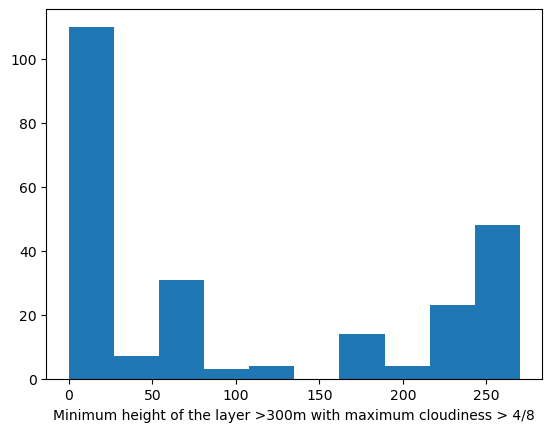

In [6]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_cloudiness_height"])
        plt.xlabel("Minimum height of the layer >300m with maximum cloudiness > 4/8")
        plt.show() 
    

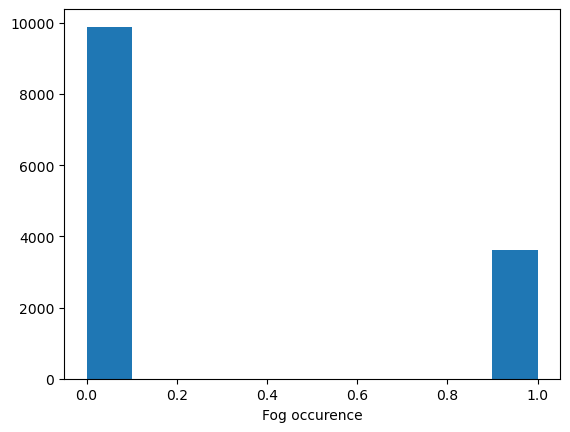

In [7]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_fog"])
        plt.xlabel("Fog occurence")
        plt.show() 
    

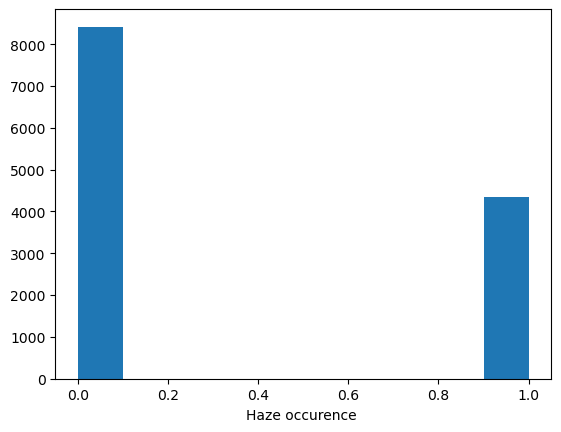

In [8]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_mist"])
        plt.xlabel("Haze occurence ")
        plt.show() 
    

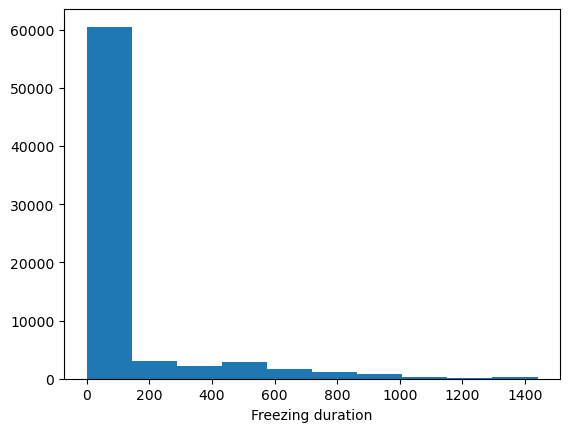

In [9]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_frost_duration"])
        plt.xlabel("Freezing duration")
        plt.show() 
    

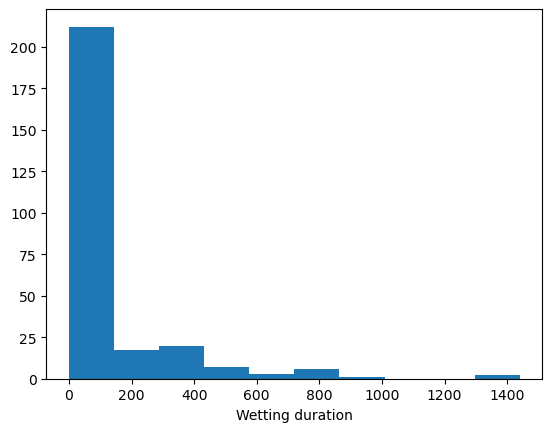

In [10]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wetting_duration"])
        plt.xlabel("Wetting duration")
        plt.show() 
    

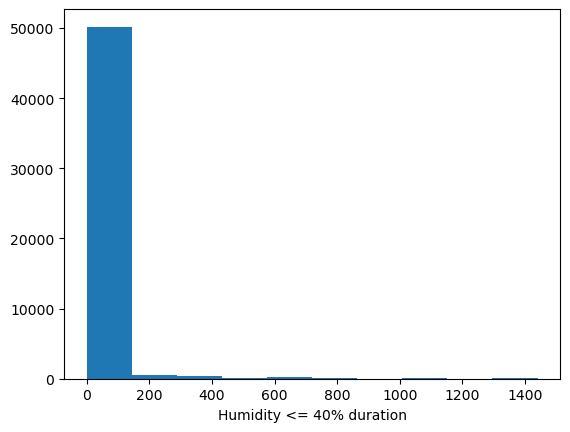

In [11]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_humidity_duration_below_40%"])
        plt.xlabel("Humidity <= 40% duration")
        plt.show() 
    

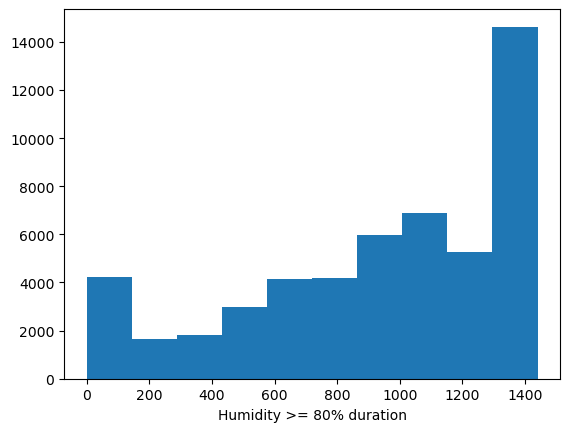

In [12]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_humidity_duration_above_80%"])
        plt.xlabel("Humidity >= 80% duration")
        plt.show() 
    

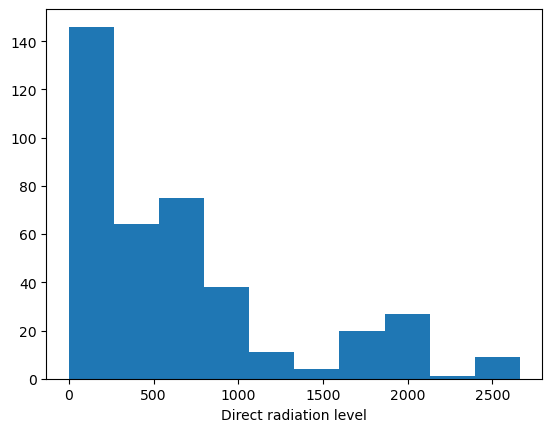

In [13]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_radiation_direct"])
        plt.xlabel("Direct radiation level")
        plt.show() 
    

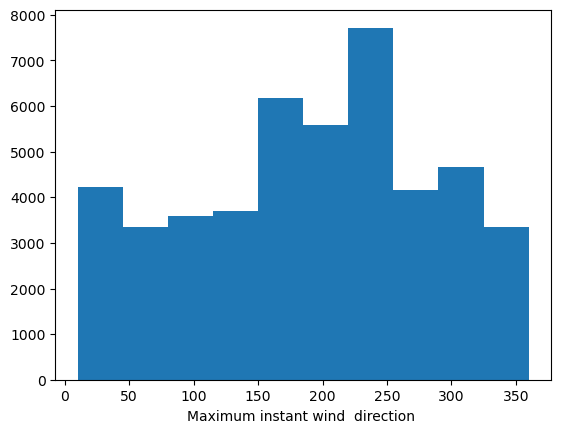

In [14]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_direction_max_inst"])
        plt.xlabel("Maximum instant wind  direction ")
        plt.show() 
    

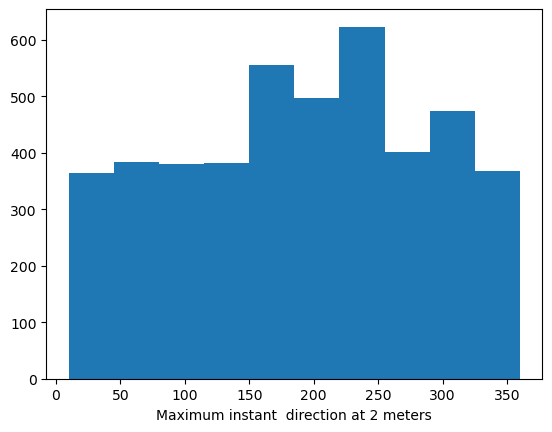

In [15]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_direction_max_inst_2m"])
        plt.xlabel("Maximum instant  direction at 2 meters")
        plt.show() 
    

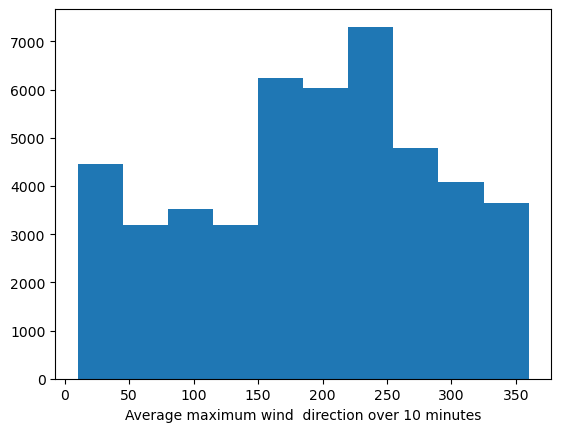

In [16]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_direction_max_avg"])
        plt.xlabel("Average maximum wind  direction over 10 minutes")
        plt.show() 
    

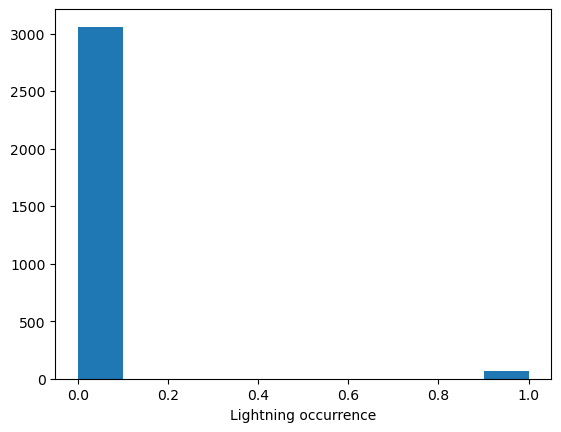

In [17]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_lightning"])
        plt.xlabel("Lightning occurrence")
        plt.show() 
    

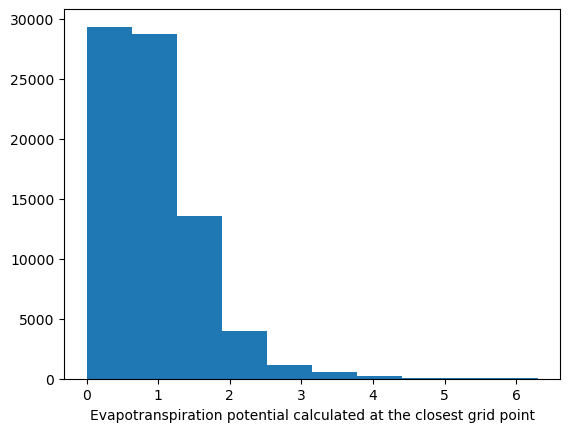

In [18]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_evapotranspiration_grid"])
        plt.xlabel("Evapotranspiration potential calculated at the closest grid point")
        plt.show() 
    

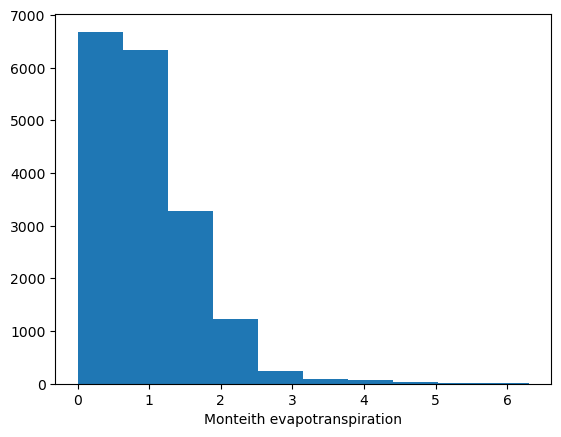

In [19]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_evapotranspiration_Monteith"])
        plt.xlabel("Monteith evapotranspiration")
        plt.show() 
    

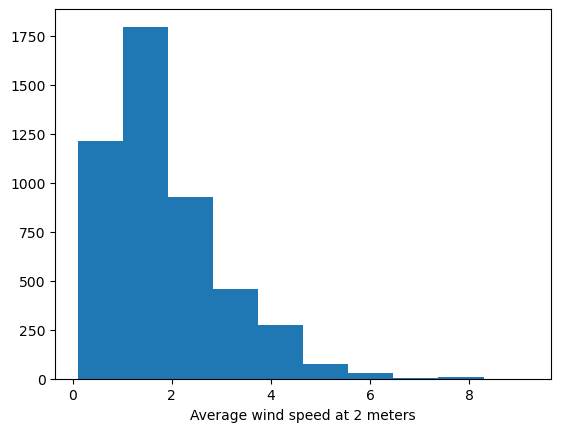

In [20]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_speed_avg_2m"])
        plt.xlabel("Average wind speed at 2 meters")
        plt.show() 
    

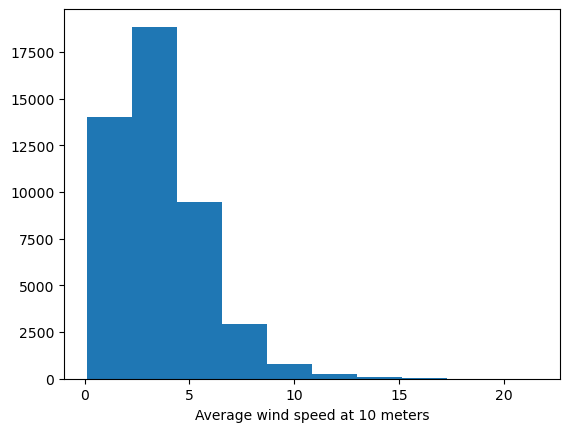

In [21]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_speed_avg_10m"])
        plt.xlabel("Average wind speed at 10 meters")
        plt.show() 
    

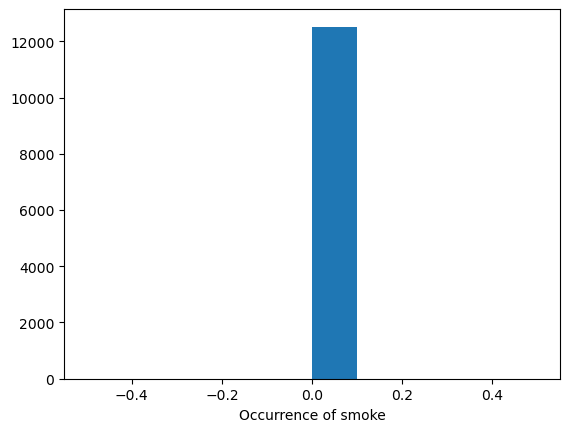

In [22]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_smoke"])
        plt.xlabel("Occurrence of smoke")
        plt.show() 
    

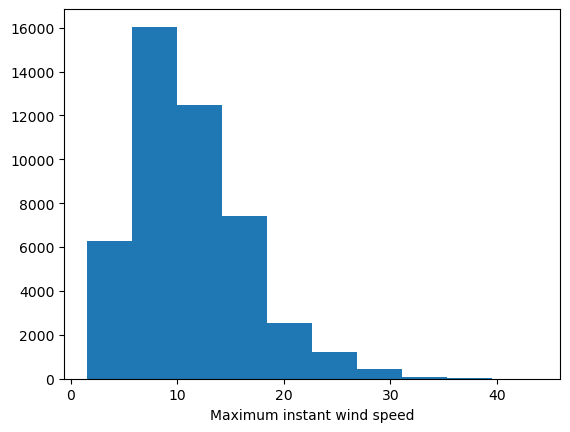

In [23]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_max"])
        plt.xlabel("Maximum instant wind speed")
        plt.show() 
    

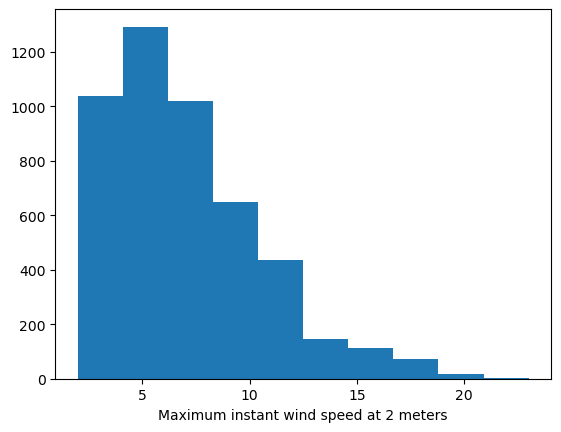

In [24]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_max_2m"])
        plt.xlabel("Maximum instant wind speed at 2 meters")
        plt.show() 
    

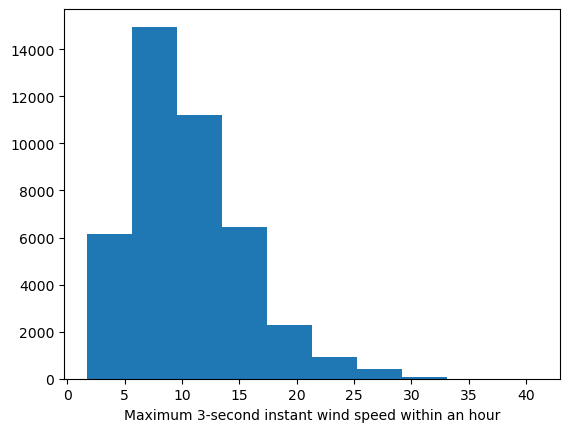

In [25]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_max_3s"])
        plt.xlabel("Maximum 3-second instant wind speed within an hour")
        plt.show() 
    

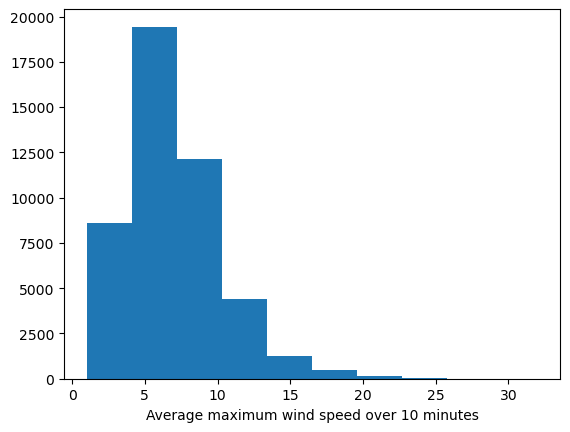

In [26]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_wind_avg"])
        plt.xlabel("Average maximum wind speed over 10 minutes")
        plt.show() 
    

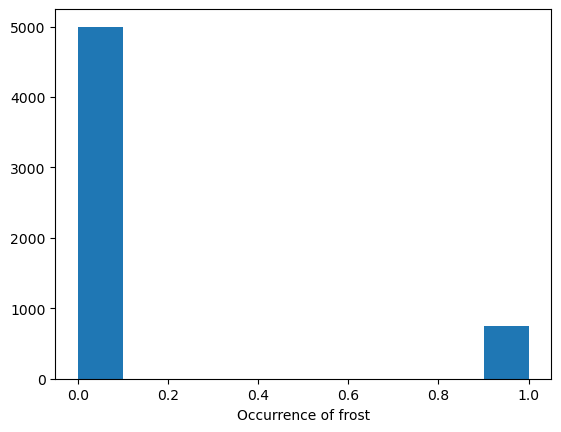

In [27]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_frost"])
        plt.xlabel("Occurrence of frost")
        plt.show() 
    

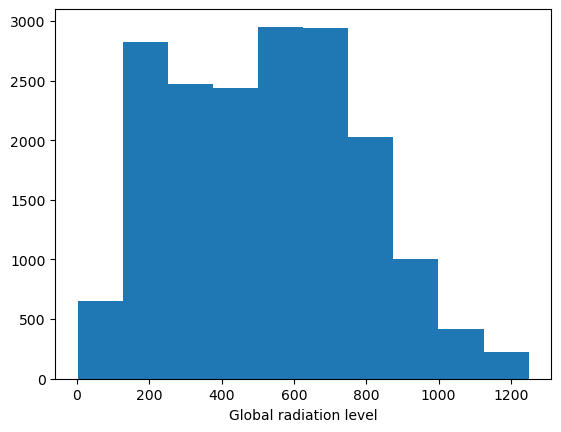

In [28]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_radiation"])
        plt.xlabel("Global radiation level")
        plt.show() 
    

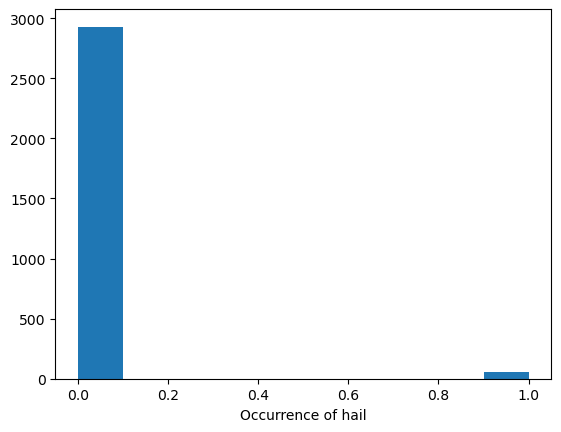

In [29]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_hail"])
        plt.xlabel("Occurrence of hail")
        plt.show() 
    

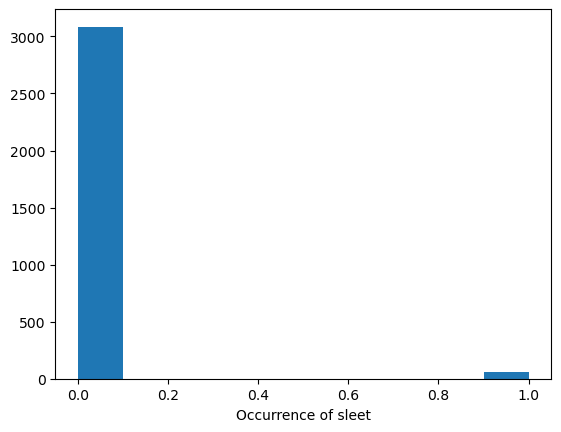

In [30]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_sleet"])
        plt.xlabel("Occurrence of sleet")
        plt.show() 
    

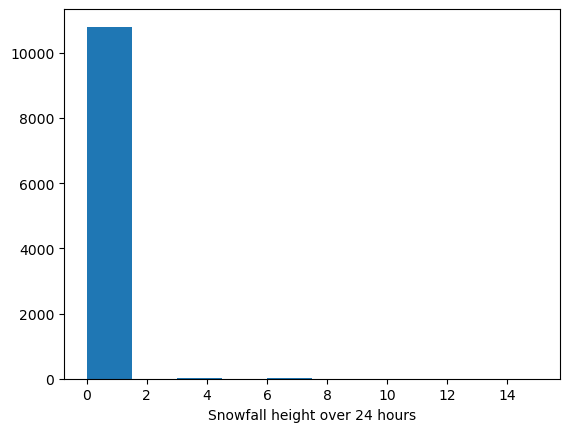

In [31]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_snow_height"])
        plt.xlabel("Snowfall height over 24 hours")
        plt.show() 
    

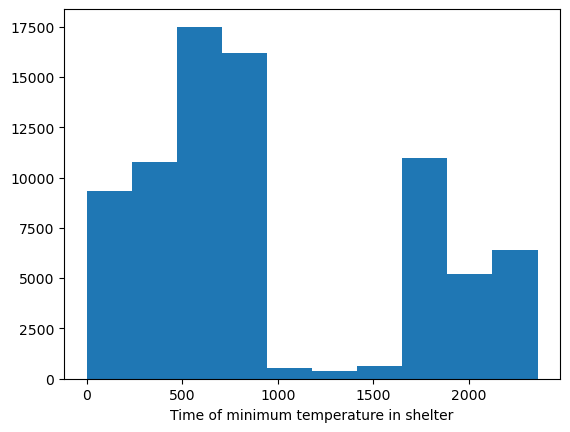

In [32]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_time_tn"])
        plt.xlabel("Time of minimum temperature in shelter")
        plt.show() 
    

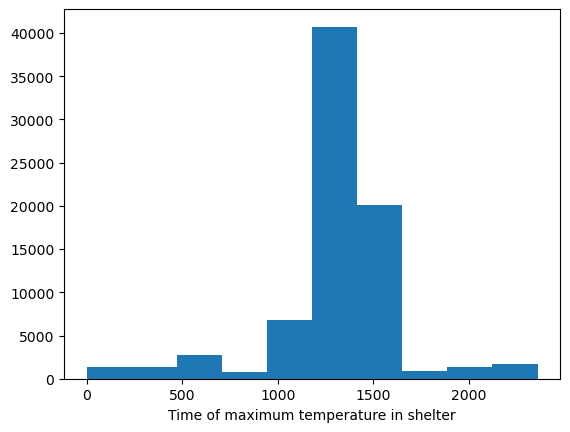

In [33]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_time_tx"])
        plt.xlabel("Time of maximum temperature in shelter")
        plt.show() 
    

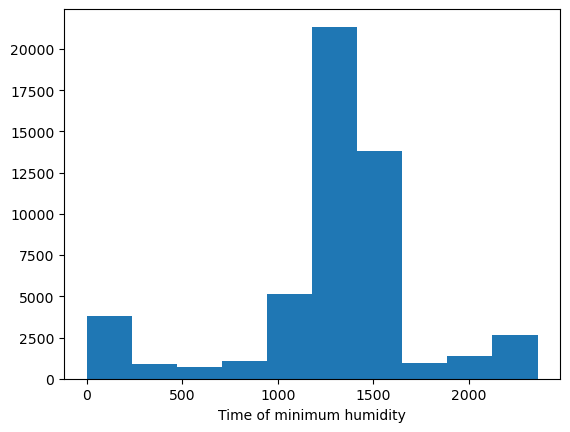

In [34]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_time_humidity_min"])
        plt.xlabel("Time of minimum humidity")
        plt.show() 
    

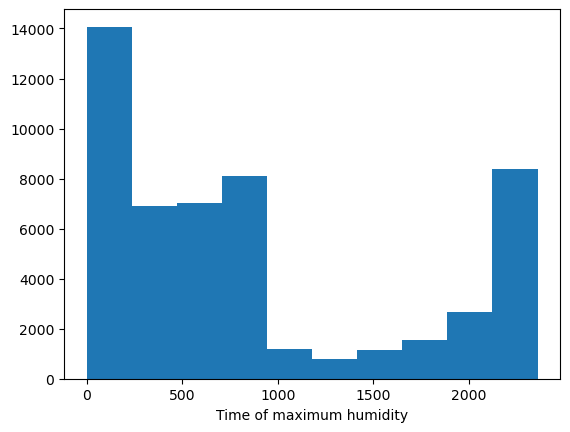

In [35]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_time_humidity_max"])
        plt.xlabel("Time of maximum humidity")
        plt.show() 
    

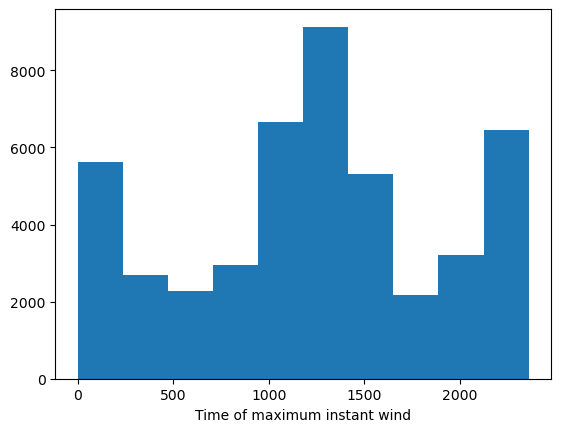

In [36]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_time_wind_max"])
        plt.xlabel("Time of maximum instant wind")
        plt.show() 
    

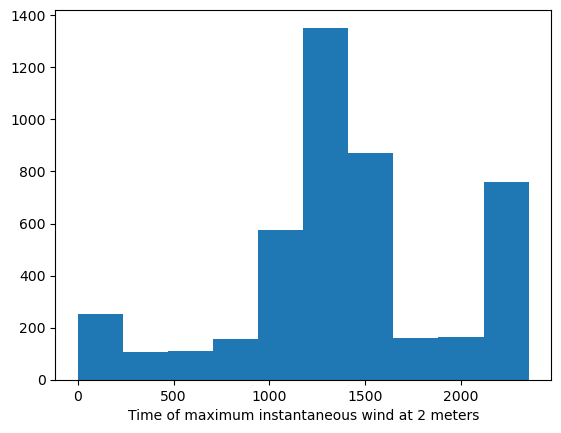

In [37]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_time_wind_max_2m"])
        plt.xlabel("Time of maximum instantaneous wind at 2 meters")
        plt.show() 
    

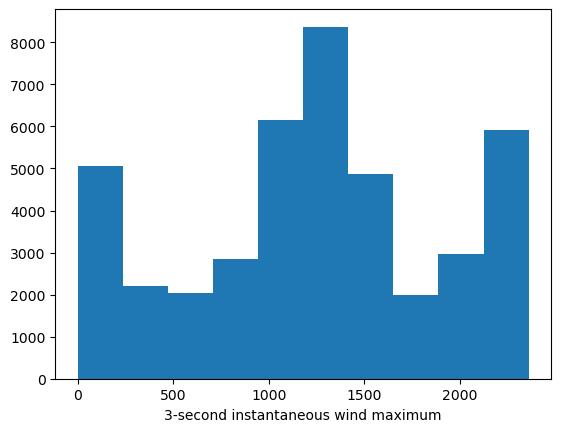

In [38]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_time_wind_max_3s"])
        plt.xlabel("3-second instantaneous wind maximum")
        plt.show() 
    

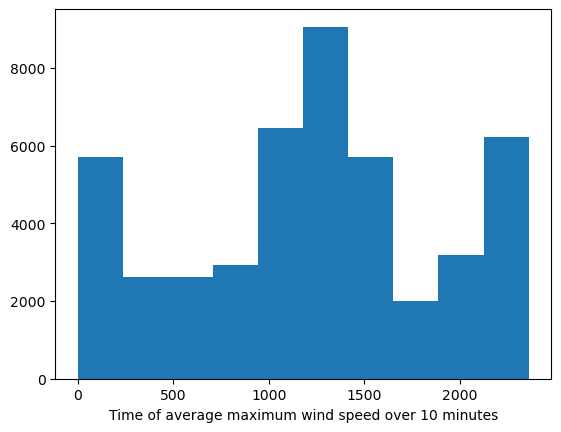

In [39]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_time_wind_avg"])
        plt.xlabel("Time of average maximum wind speed over 10 minutes")
        plt.show() 
    

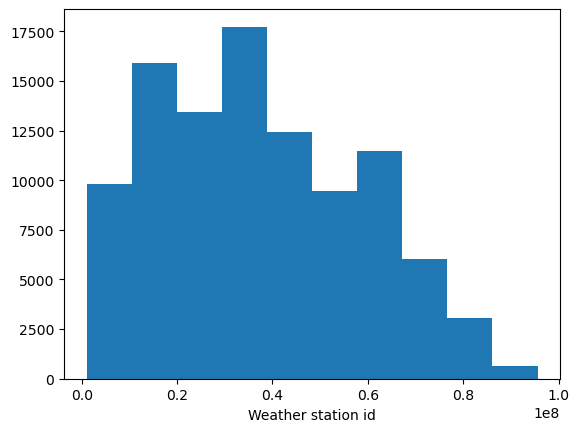

In [40]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_id"])
        plt.xlabel("Weather station id")
        plt.show() 
    

/nix/store/ig7q9ywj44mi57qxc0slc7zdyp4jrv74-python3-3.12.7-env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/nix/store/ig7q9ywj44mi57qxc0slc7zdyp4jrv74-python3-3.12.7-env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

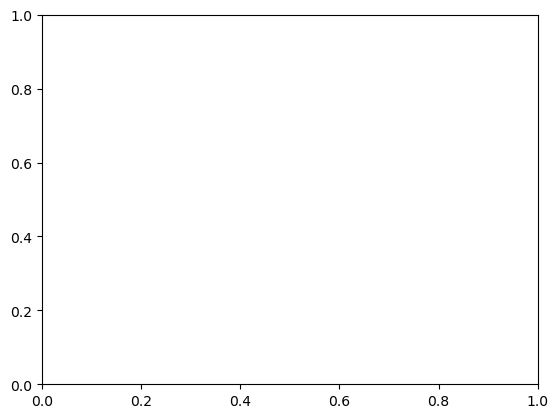

In [41]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_radiation_IR"])
        plt.xlabel("Total hourly infrared radiation")
        plt.show() 
    

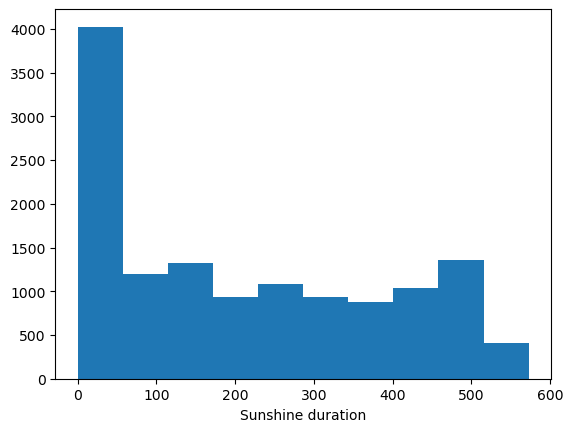

In [42]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_sunshine_duration"])
        plt.xlabel("Sunshine duration")
        plt.show() 
    

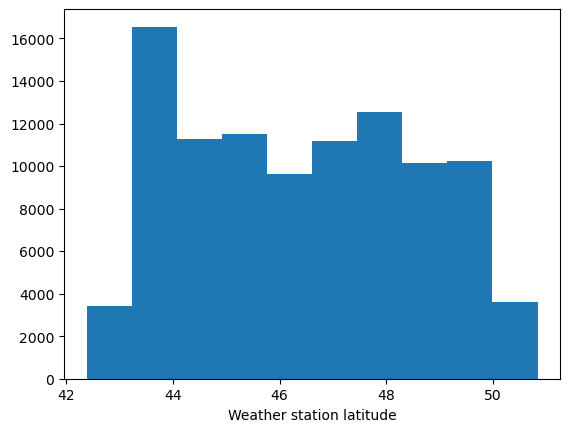

In [43]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_longitude"])
        plt.xlabel("Weather station latitude")
        plt.show() 
    

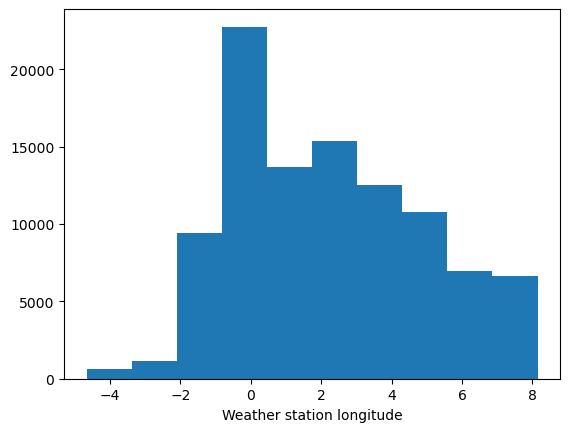

In [44]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_latitude"])
        plt.xlabel("Weather station longitude")
        plt.show() 
    

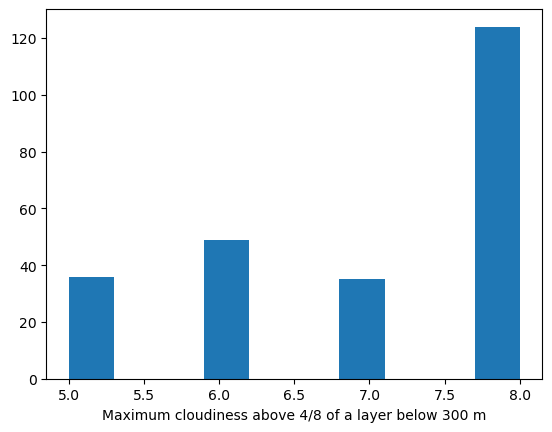

In [45]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_cloudiness"])
        plt.xlabel("Maximum cloudiness above 4/8 of a layer below 300 m")
        plt.show() 
    

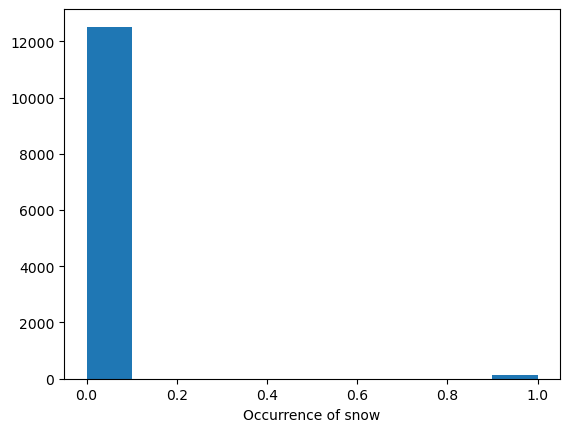

In [46]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_snow"])
        plt.xlabel("Occurrence of snow")
        plt.show() 
    

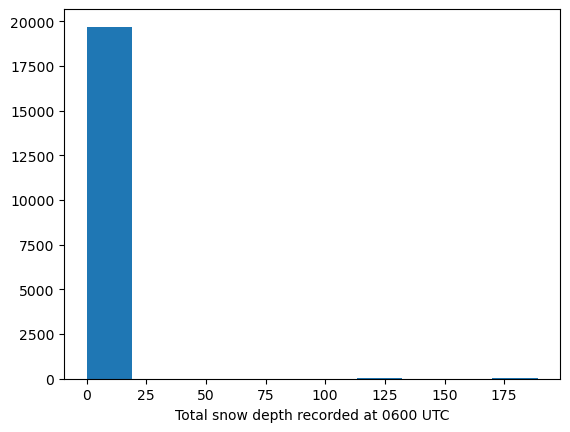

In [47]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_snow_thickness_6h"])
        plt.xlabel("Total snow depth recorded at 0600 UTC")
        plt.show() 
    

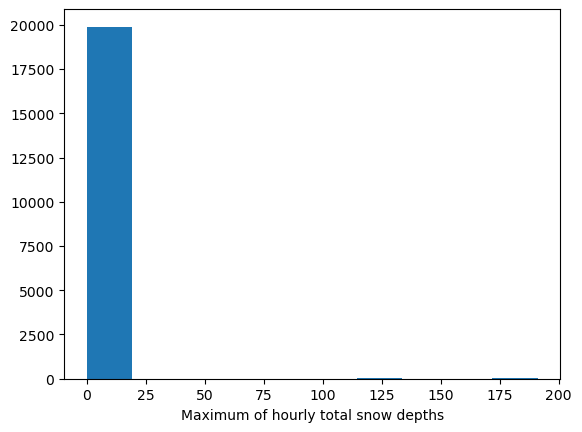

In [48]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_snow_thickness_max"])
        plt.xlabel("Maximum of hourly total snow depths")
        plt.show() 
    

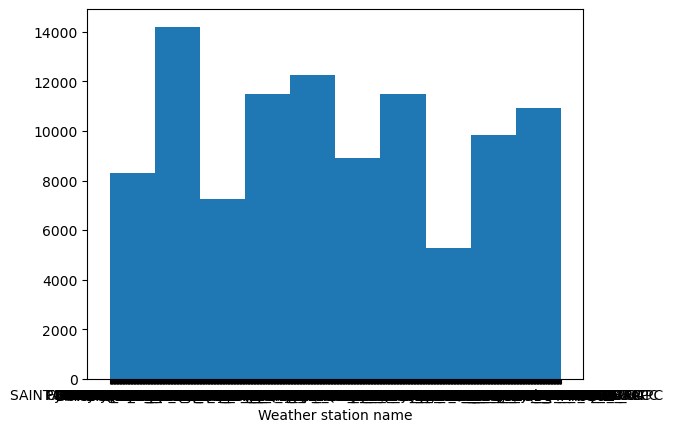

In [49]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_name"])
        plt.xlabel("Weather station name")
        plt.show() 
    

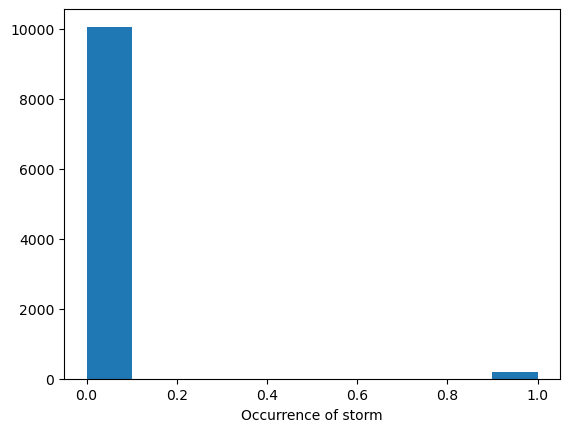

In [50]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_thunderstorm"])
        plt.xlabel("Occurrence of storm")
        plt.show() 
    

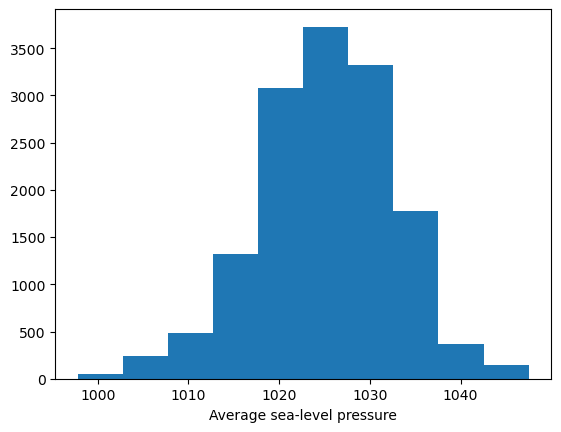

In [51]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_pressure_avg"])
        plt.xlabel("Average sea-level pressure")
        plt.show() 
    

In [52]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_pressure_max"])
        plt.xlabel("Minimum sea-level pressure")
        plt.show() 
    

KeyError: 'meteo_pressure_max'

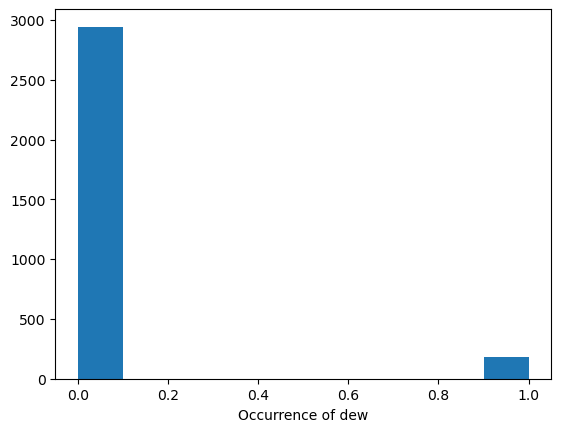

In [53]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_dew"])
        plt.xlabel("Occurrence of dew")
        plt.show() 
    

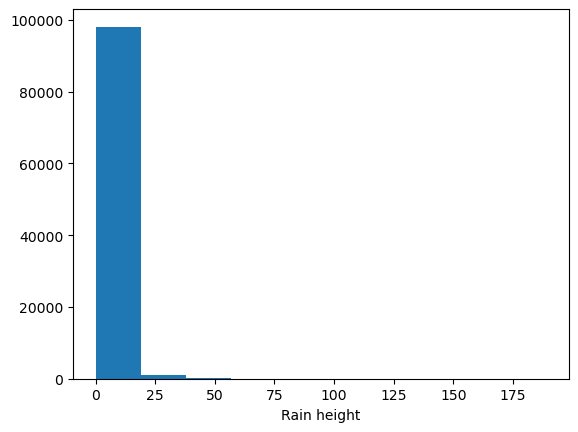

In [54]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_rain_height"])
        plt.xlabel("Rain height")
        plt.show() 
    

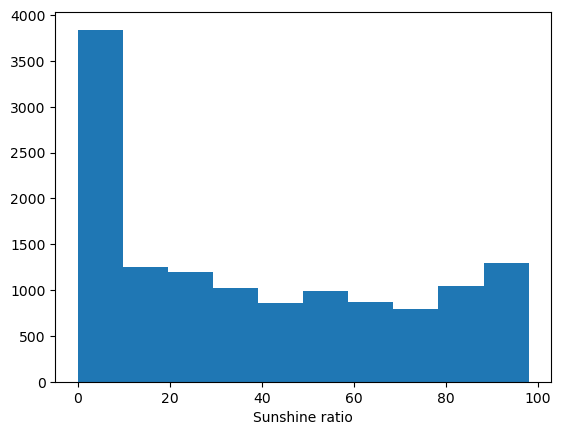

In [55]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_sunshine_%"])
        plt.xlabel("Sunshine ratio")
        plt.show() 
    

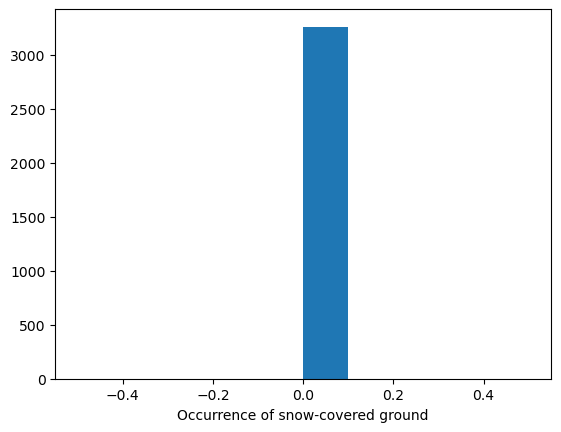

In [56]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_snow_ground"])
        plt.xlabel("Occurrence of snow-covered ground")
        plt.show() 
    

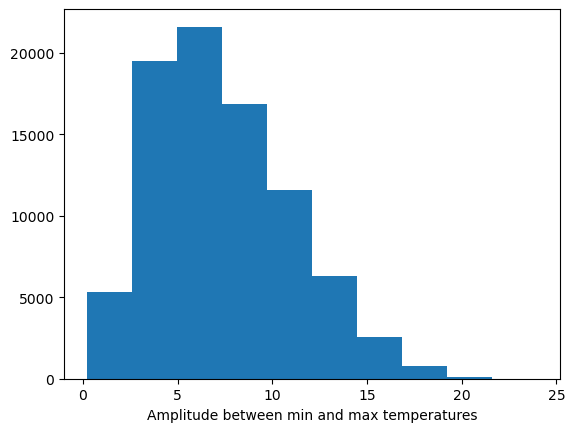

In [57]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_amplitude_tn_tx"])
        plt.xlabel("Amplitude between min and max temperatures")
        plt.show() 
    

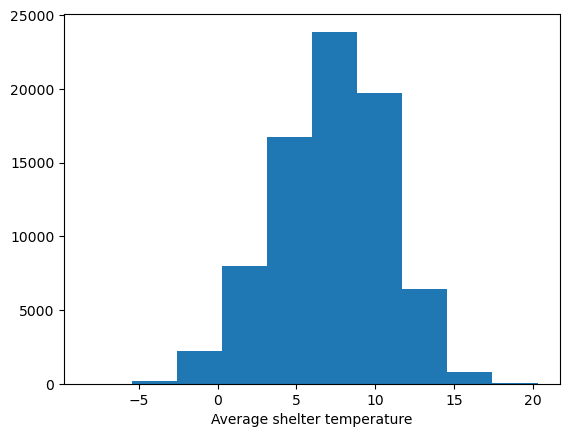

In [58]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_temperature_avg"])
        plt.xlabel("Average shelter temperature")
        plt.show() 
    

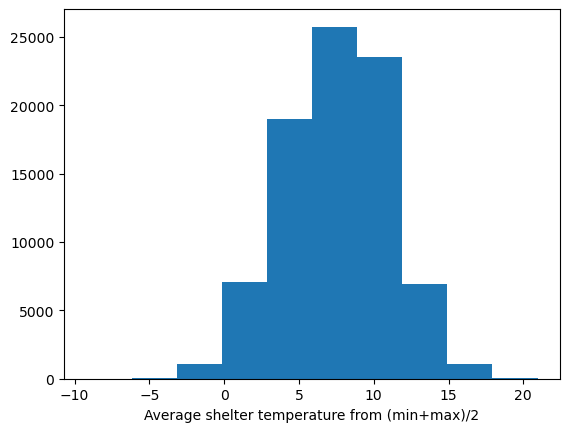

In [59]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_temperature_avg_threshold"])
        plt.xlabel("Average shelter temperature from (min+max)/2")
        plt.show() 
    

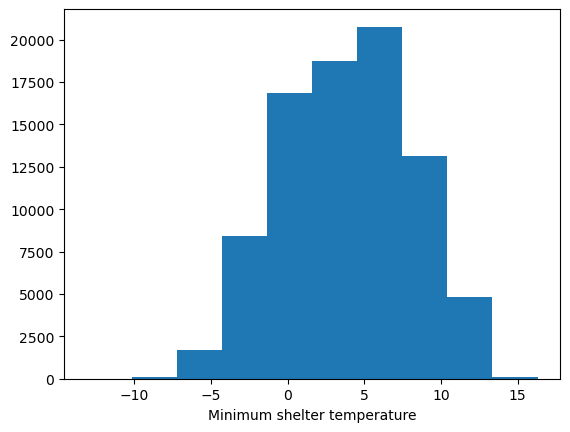

In [60]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_temperature_min"])
        plt.xlabel("Minimum shelter temperature")
        plt.show() 
    

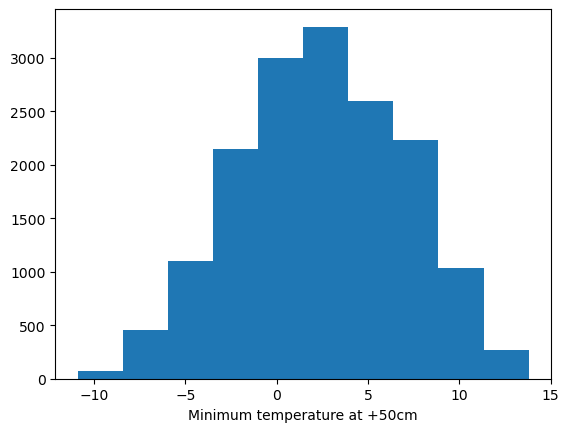

In [61]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_temperature_min_50cm"])
        plt.xlabel("Minimum temperature at +50cm")
        plt.show() 
    

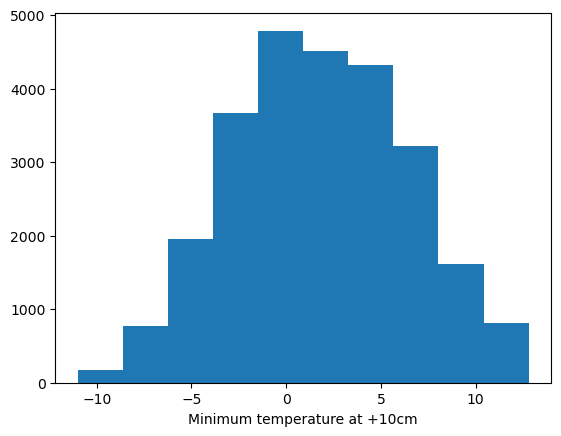

In [62]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_temperature_min_ground"])
        plt.xlabel("Minimum temperature at +10cm")
        plt.show() 
    

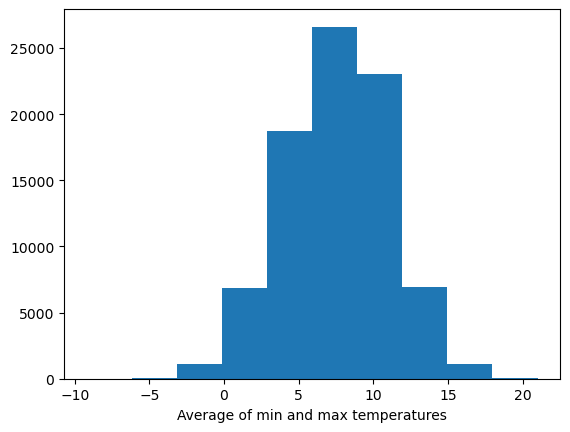

In [63]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_temperature_avg_tntm"])
        plt.xlabel("Average of min and max temperatures")
        plt.show() 
    

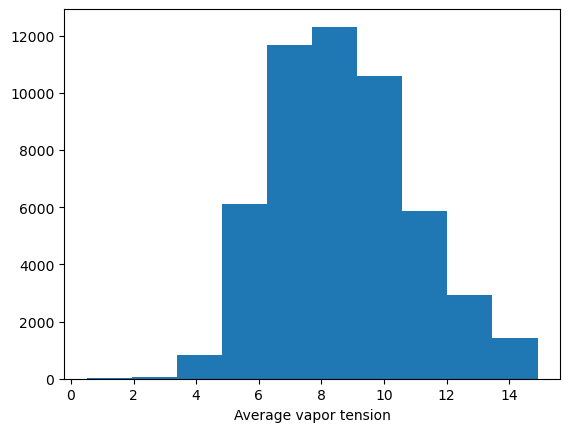

In [64]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo__pressure_saturation_avg"])
        plt.xlabel("Average vapor tension")
        plt.show() 
    

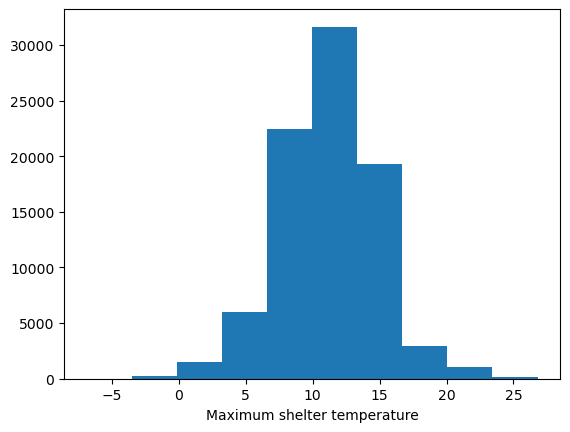

In [65]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_temperature_max"])
        plt.xlabel("Maximum shelter temperature")
        plt.show() 
    

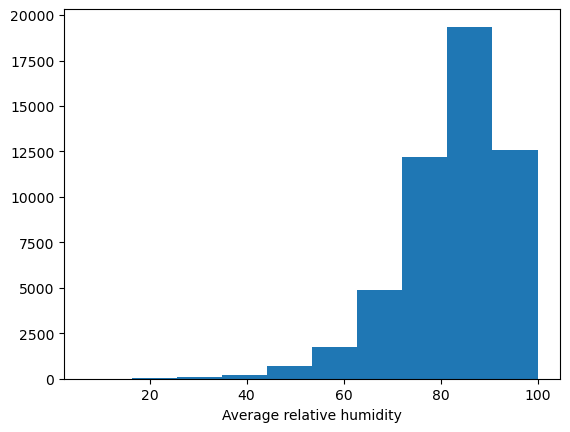

In [66]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_humidity_avg"])
        plt.xlabel("Average relative humidity")
        plt.show() 
    

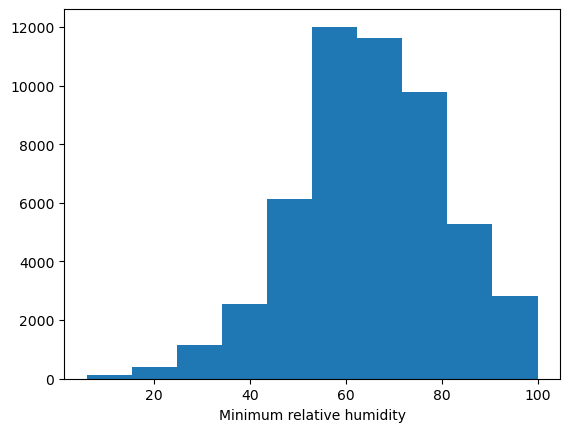

In [67]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_humidity_min"])
        plt.xlabel("Minimum relative humidity")
        plt.show() 
    

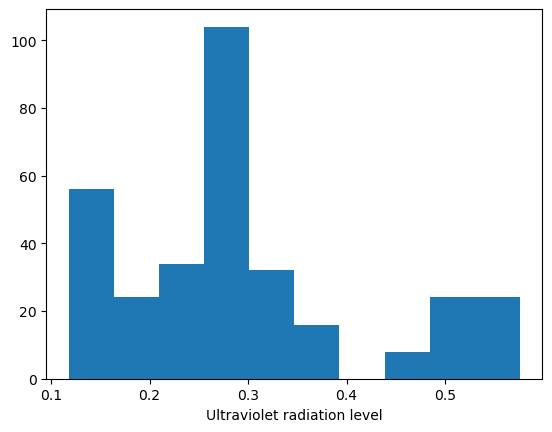

In [68]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_radiation_UV"])
        plt.xlabel("Ultraviolet radiation level")
        plt.show() 
    

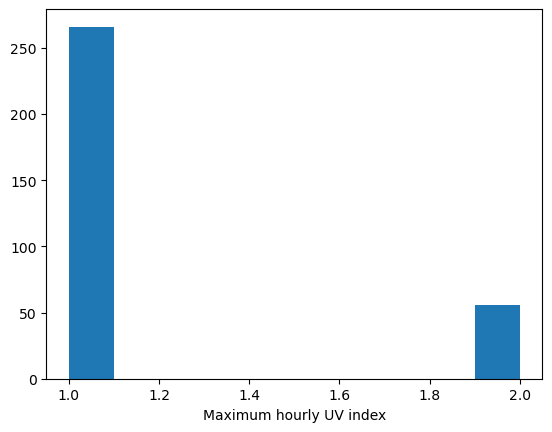

In [69]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_radiation_UV_max"])
        plt.xlabel("Maximum hourly UV index")
        plt.show() 
    

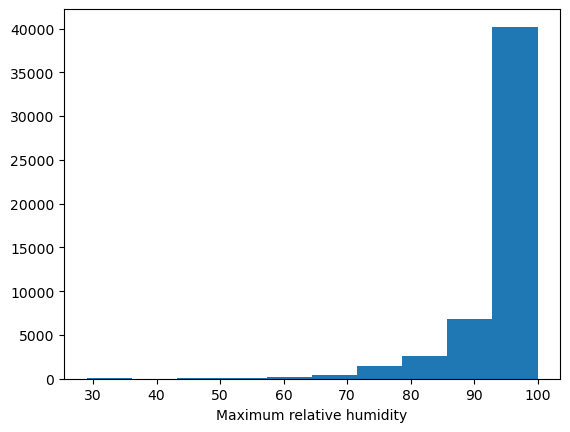

In [70]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_humidity_max"])
        plt.xlabel("Maximum relative humidity")
        plt.show() 
    

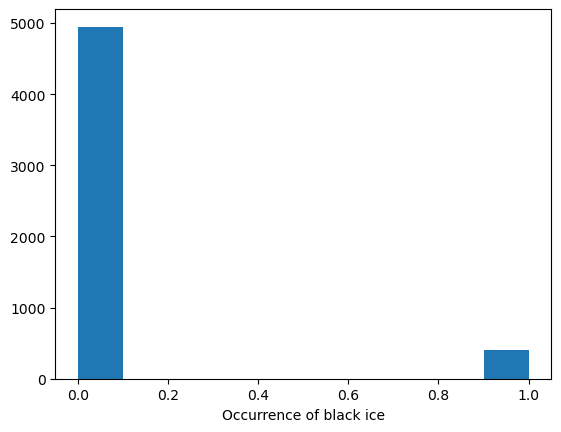

In [71]:

        import matplotlib.pyplot as plt

        plt.hist(meteo_variables["meteo_if_black_ice"])
        plt.xlabel("Occurrence of black ice")
        plt.show() 
    